In [1]:
# Author : Rajaraman
# Project : Data science
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart= pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(1025, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
print('unique entries in each column')
heart.nunique()

unique entries in each column


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
# distribution of the range of ages for heart attack plot
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

In [6]:
heart.head()

Age  Gender  ChestPain  RestingBloodPressure  Cholestrol  \
0   52       1          0                   125         212   
1   53       1          0                   140         203   
2   70       1          0                   145         174   
3   61       1          0                   148         203   
4   62       0          0                   138         294   

   FastingBloodSugar  RestingECG  MaxHeartRateAchivied  ExerciseIndusedAngina  \
0                  0           1                   168                      0   
1                  1           0                   155                      1   
2                  0           1                   125                      1   
3                  0           1                   161                      0   
4                  1           1                   106                      0   

   Oldpeak  Slope  MajorVessels  Thalassemia  Target  
0      1.0      2             2            3       0  
1      3.1      0             0            3       0  
2      2.6      0             0            3       0  
3      0.0      2             1            3       0  
4      1.9      1             3            2       0

In [7]:
bg_color = (0.15, 0.05, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})  

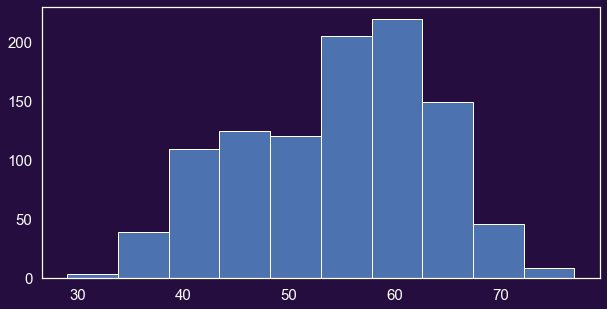

In [8]:
heart['Age'].hist(grid=False)

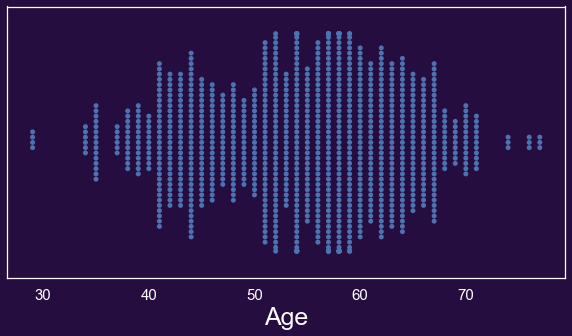

In [9]:
# subselect features of interest and then perform classification 
# divide dataset into training, test and validation 
sns.swarmplot(heart['Age'])

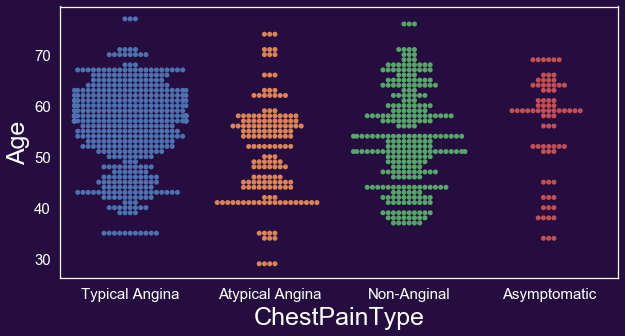

In [46]:
result=[]
for i in heart['ChestPain']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal')
    if i==3:
        result.append('Asymptomatic')
        
heart['ChestPainType']=pd.Series(result)

sns.swarmplot(x='ChestPainType', y='Age', data=heart)

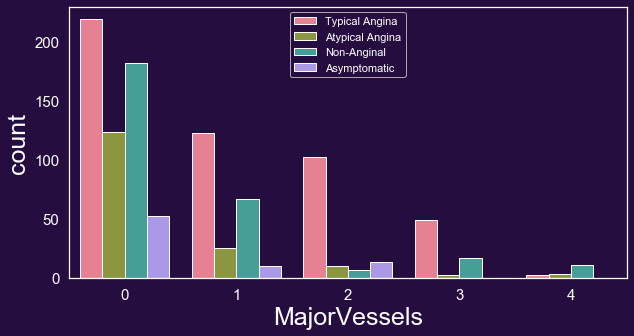

In [47]:
#check the relation of major vessels and chest pain type
ax=sns.countplot(hue=result,x='MajorVessels',data=heart,palette='husl')

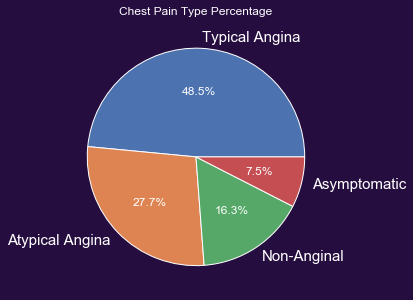

In [48]:
# plot the pie chart indicating distribution of each chest pain type
ChestPain=(heart['ChestPainType']).value_counts()
percent_typAng= ChestPain[0] *100/ len(heart)
percent_AtypAng=ChestPain[1]*100/len(heart)
percent_nonAng=ChestPain[2]*100/len(heart)
percent_none=ChestPain[3]*100/len(heart)

values= [percent_typAng, percent_AtypAng, percent_nonAng, percent_none]
labels=['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Chest Pain Type Percentage")    
plt.show()

[<matplotlib.patches.Rectangle object at 0x000001D2DDDA84E0>, <matplotlib.patches.Rectangle object at 0x000001D2DDD6BE10>, <matplotlib.patches.Rectangle object at 0x000001D2DDDA8898>, <matplotlib.patches.Rectangle object at 0x000001D2DDDA8438>, <matplotlib.patches.Rectangle object at 0x000001D2DDDA8A20>, <matplotlib.patches.Rectangle object at 0x000001D2DDDA83C8>, <matplotlib.patches.Rectangle object at 0x000001D2DDDB4128>, <matplotlib.patches.Rectangle object at 0x000001D2DDDA8358>]


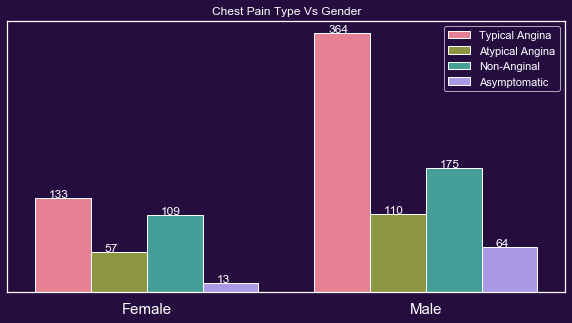

In [49]:
# do a gender comparison 
ax = sns.countplot(hue=result,x='Gender',data=heart,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

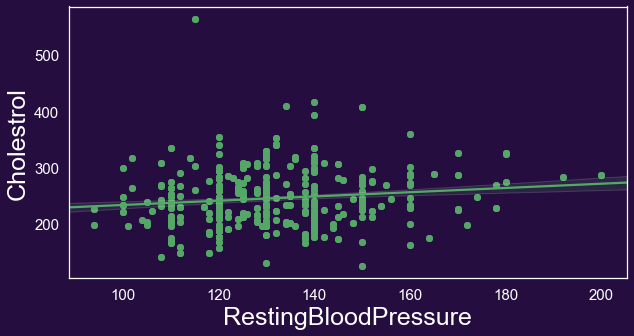

In [50]:
#check if bp and cholestrol are correlated
ax = sns.regplot(x='RestingBloodPressure', y='Cholestrol',data=heart, color="g")